# DSP Assignment-2: Transform Analysis

## 設定 z transform

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, group_delay, lfilter, zpk2tf

# 架設 z = e^(jω)
omega = np.linspace(-np.pi, np.pi, 16000)
z = np.exp(1j * omega)

# H1(z)
H1 = ((1 - 0.98 * np.exp(1j * 0.8 * np.pi) / z) * (1 - 0.98 * np.exp(-1j * 0.8 * np.pi) / z)) / \
     ((1 - 0.8 * np.exp(1j * 0.4 * np.pi) / z) * (1 - 0.8 * np.exp(-1j * 0.4 * np.pi) / z))

# H2(z)
k_values = [1, 2, 3, 4]
H2 = np.ones_like(omega, dtype=complex)  # 初始化為 1
for k in k_values:
    ck = 0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * k))
    H2 *= (((np.conj(ck) - 1 / z) * (ck - 1 / z)) / ((1 - ck / z) * (1 - np.conj(ck) / z))) **2

H = H1 * H2

## 1. Phase (principal value and continuous phase)

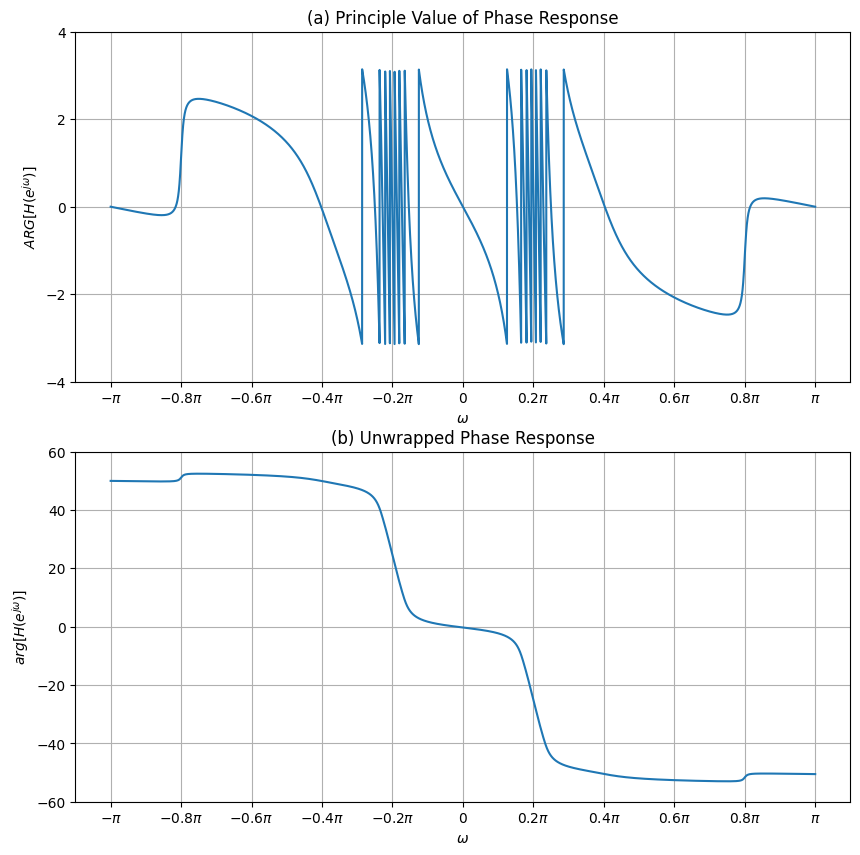

In [26]:
principal_phase = np.angle(H)
continuous_phase = np.unwrap(principal_phase) + 50

plt.figure(figsize=(10, 10))
# a圖： Principle Value of Phase Response
plt.subplot(2, 1, 1)
plt.plot(omega, principal_phase)
plt.title("(a) Principle Value of Phase Response")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$ARG[H(e^{j\omega})]$")
plt.xticks(ticks=[-np.pi, -np.pi*0.8, -np.pi*0.6, -np.pi*0.4, -np.pi*0.2, 0, np.pi*0.2, np.pi*0.4, np.pi*0.6, np.pi*0.8, np.pi],
           labels=[r"$-\pi$", r"$-0.8\pi$", r"$-0.6\pi$", r"$-0.4\pi$", r"$-0.2\pi$", "0", r"$0.2\pi$", r"$0.4\pi$", r"$0.6\pi$", r"$0.8\pi$", r"$\pi$"])
plt.yticks(ticks=[-4, -2, 0, 2, 4])
plt.grid()

# b圖： Unwrapped Phase Response
plt.subplot(2, 1, 2)
plt.plot(omega, continuous_phase)
plt.title("(b) Unwrapped Phase Response")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$arg[H(e^{j\omega})]$")
plt.xticks(ticks=[-np.pi, -np.pi*0.8, -np.pi*0.6, -np.pi*0.4, -np.pi*0.2, 0, np.pi*0.2, np.pi*0.4, np.pi*0.6, np.pi*0.8, np.pi],
           labels=[r"$-\pi$", r"$-0.8\pi$", r"$-0.6\pi$", r"$-0.4\pi$", r"$-0.2\pi$", "0", r"$0.2\pi$", r"$0.4\pi$", r"$0.6\pi$", r"$0.8\pi$", r"$\pi$"])
plt.yticks(ticks=range(-60, 61, 20))
plt.grid()

plt.show()

## 2. Group delay & magnitude

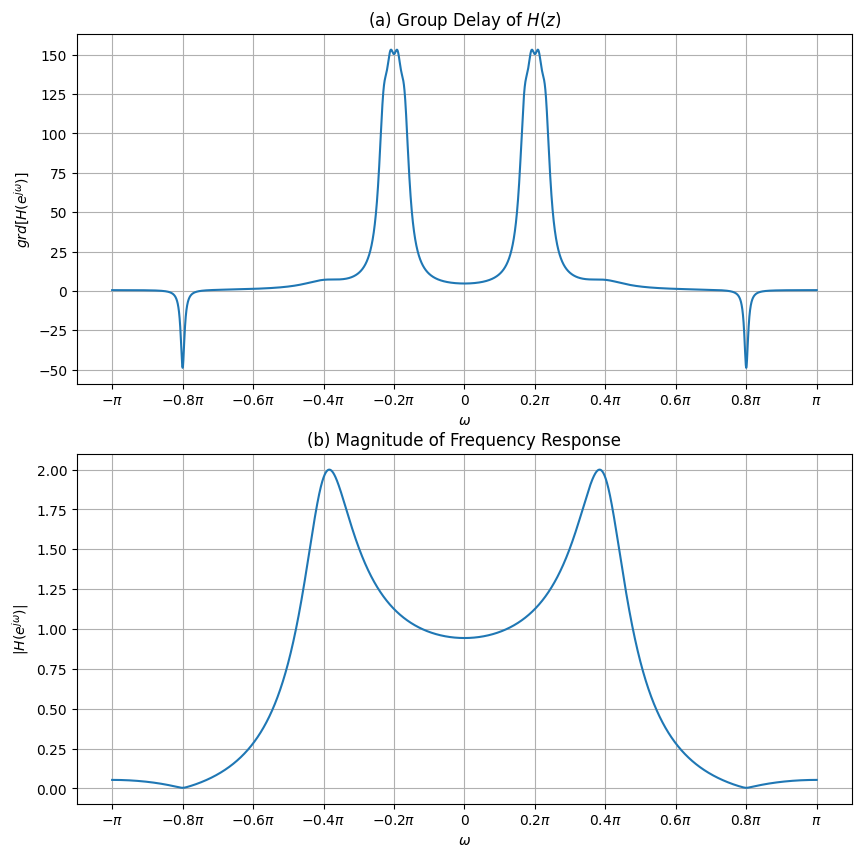

In [35]:
magnitude = np.abs(H)
magnitude /= np.max(magnitude) / 2

frequencies = np.linspace(-np.pi, np.pi, len(H))
group_delay_values = -np.gradient(np.unwrap(np.angle(H)), frequencies)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(frequencies / np.pi, group_delay_values)
plt.title(r'(a) Group Delay of $H(z)$')
plt.xticks(ticks=[-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1],
           labels=[r"$-\pi$", r"$-0.8\pi$", r"$-0.6\pi$", r"$-0.4\pi$", r"$-0.2\pi$", "0", r"$0.2\pi$", r"$0.4\pi$", r"$0.6\pi$", r"$0.8\pi$", r"$\pi$"])
plt.ylabel(r'$grd[H(e^{j\omega})]$')
plt.xlabel(r"$\omega$")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(frequencies / np.pi, magnitude)
plt.title('(b) Magnitude of Frequency Response')
plt.xticks(ticks=[-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1],
           labels=[r"$-\pi$", r"$-0.8\pi$", r"$-0.6\pi$", r"$-0.4\pi$", r"$-0.2\pi$", "0", r"$0.2\pi$", r"$0.4\pi$", r"$0.6\pi$", r"$0.8\pi$", r"$\pi$"])
plt.ylabel(r'$|H(e^{j\omega})|$')
plt.xlabel(r"$\omega$")
plt.grid()

plt.show()

## 3. 產生波形以及對應的DTFT (波型分別是頻率為 0.8pi、0.2pi 、以及 0.4pi的弦波乘上 hanning window )

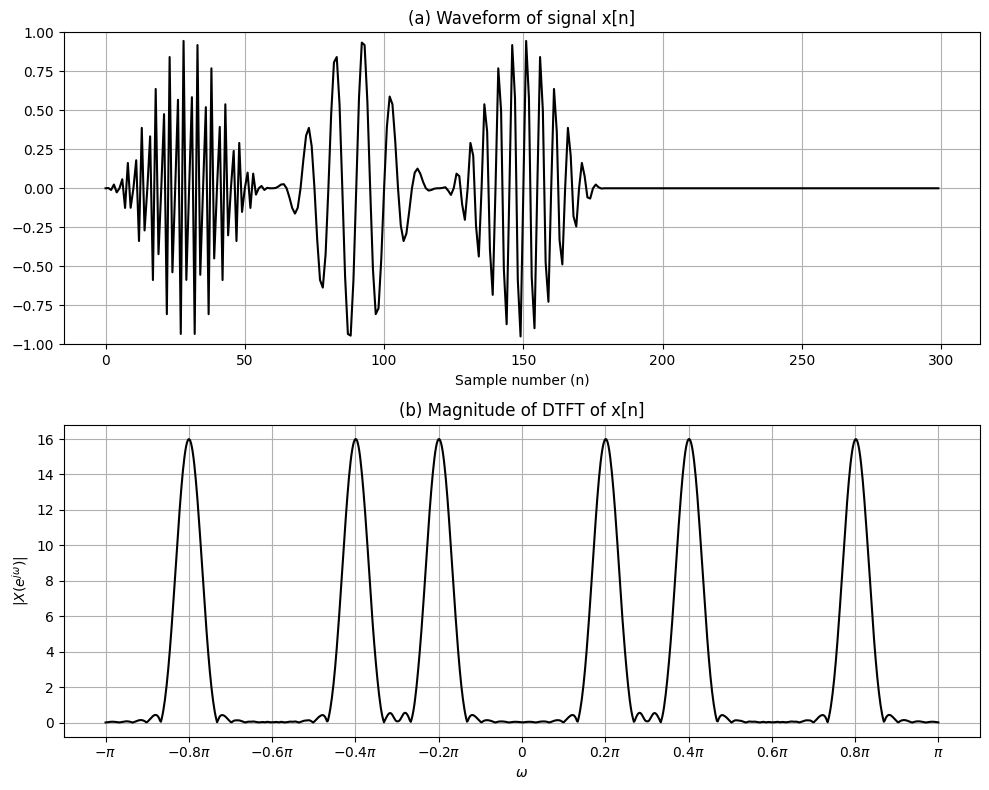

In [42]:
n = np.arange(300)
frequencies = [0.8 * np.pi, 0.2 * np.pi, 0.4 * np.pi]

x1 = np.sin(0.8 * np.pi * n[:60]) * np.hanning(60)
x2 = np.sin(0.2 * np.pi * n[60:120]) * np.hanning(60)
x3 = np.sin(0.4 * np.pi * n[120:180]) * np.hanning(60)
x4 = np.zeros(120)
x = np.concatenate((x1, x2, x3, x4))

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(n, x, color='black')
plt.title("(a) Waveform of signal x[n]")
plt.xlabel("Sample number (n)")
plt.ylim(-1, 1)
plt.grid()

omega = np.linspace(-np.pi, np.pi, 1024)
X = np.fft.fftshift(np.fft.fft(x, 1024))
plt.subplot(2, 1, 2)
plt.plot(omega, np.abs(X) / max(np.abs(X)) * 16, color='black')
plt.title("(b) Magnitude of DTFT of x[n]")
plt.xlabel("Frequency (ω)")
plt.ylabel(r'$|X(e^{j\omega})|$')
plt.xlabel(r"$\omega$")
plt.xticks(ticks=[-np.pi, -np.pi*0.8, -np.pi*0.6, -np.pi*0.4, -np.pi*0.2, 0, np.pi*0.2, np.pi*0.4, np.pi*0.6, np.pi*0.8, np.pi],
           labels=[r"$-\pi$", r"$-0.8\pi$", r"$-0.6\pi$", r"$-0.4\pi$", r"$-0.2\pi$", "0", r"$0.2\pi$", r"$0.4\pi$", r"$0.6\pi$", r"$0.8\pi$", r"$\pi$"])
plt.grid()
plt.tight_layout()
plt.show()


## 4. 將題目 3 產生的波形輸入至 LCCDE 來做 filtering

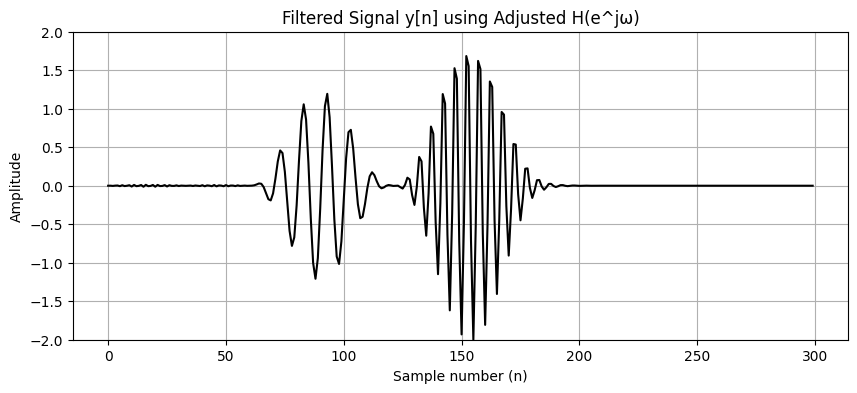

In [41]:
zeros = [
    0.98 * np.exp(1j * 0.8 * np.pi),
    0.98 * np.exp(-1j * 0.8 * np.pi),
    (0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 1))-1)**2,
    (np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 1)))-1)**2,
    (0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 2))-1)**2,
    (np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 2)))-1)**2,
    (0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 3))-1)**2,
    (np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 3)))-1)**2,
    (0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 4))-1)**2,
    (np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 4)))-1)**2
]
poles = [
    0.8 * np.exp(1j * 0.4 * np.pi),
    0.8 * np.exp(-1j * 0.4 * np.pi),
    (1 - 0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 1)))**2,
    (1 - np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 1))))**2,
    (1 - 0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 2)))**2,
    (1 - np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 2))))**2,
    (1 - 0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 3)))**2,
    (1 - np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 3))))**2,
    (1 - 0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 4)))**2,
    (1 - np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 4))))**2
]
gain = 1

b, a = zpk2tf(zeros, poles, gain)

y = lfilter(b, a, x)
y = y / np.max(np.abs(y)) * 2

plt.figure(figsize=(10, 4))
plt.plot(n, y, color='black')
plt.title("Filtered Signal y[n] using Adjusted H(e^jω)")
plt.xlabel("Sample number (n)")
plt.ylabel("Amplitude")
plt.ylim(-2, 2)
plt.grid()
plt.show()